In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt

from config import Config

cfg = Config()

Global seed set to 0



[ Config ]
TIME : 2014-01-01 ~ 2015-12-31
SYMBOL : ['AAPL', 'ABB', 'ABBV', 'AEP', 'AGFS', 'AMGN', 'AMZN', 'BA', 'BABA', 'BAC', 'BBL', 'BCH', 'BHP', 'BP', 'BRK-A', 'BSAC', 'BUD', 'C', 'CAT', 'CELG', 'CHL', 'CHTR', 'CMCSA', 'CODI', 'CSCO', 'CVX', 'D', 'DHR', 'DIS', 'DUK', 'EXC', 'FB', 'GD', 'GE', 'GOOG', 'HD', 'HON', 'HRG', 'HSBC', 'IEP', 'INTC', 'JNJ', 'JPM', 'KO', 'LMT', 'MA', 'MCD', 'MDT', 'MMM', 'MO', 'MRK', 'MSFT', 'NEE', 'NGG', 'NVS', 'ORCL', 'PCG', 'PCLN', 'PEP', 'PFE', 'PG', 'PICO', 'PM', 'PPL', 'PTR', 'RDS-B', 'REX', 'SLB', 'SNP', 'SNY', 'SO', 'SPLP', 'SRE', 'T', 'TM', 'TOT', 'TSM', 'UL', 'UN', 'UNH', 'UPS', 'UTX', 'V', 'VZ', 'WFC', 'WMT', 'XOM']


In [2]:
start_date = '2014-01-01'
end_date = '2015-12-31'

In [3]:
column_list = ['Open', 'High', 'Low', 'Close', 'Volume']
def replace_with_scaled(stock_df):
    robustScaler = RobustScaler()
    robustScaler.fit(stock_df[column_list])
    scaled_data = robustScaler.transform(stock_df[column_list])
    
    stock_df['Open'] = scaled_data[:, 0]
    stock_df['High'] = scaled_data[:, 1]
    stock_df['Low'] = scaled_data[:, 2]
    stock_df['Close'] = scaled_data[:, 3]
    stock_df['Volume'] = scaled_data[:, 4]
    
    return stock_df

In [5]:
for symbol in cfg.SYMBOL_LIST:
    stock_df = pd.read_csv(f'{cfg.RAW_PATH}/{symbol}.csv')

    # start_data ~ end_date에 해당하는 데이터 분리
    stock_df = stock_df[(start_date <= stock_df['Date']) & (stock_df['Date'] <= end_date)]

    stock_df = stock_df.drop('Adj Close', axis=1)
    
    stock_df = stock_df.reset_index()
    
    stock_df = replace_with_scaled(stock_df)
    
    stock_df.to_feather(f'{cfg.SCALED_PATH}/{symbol}.ftr')

In [11]:
column_list = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
tmp = pd.read_feather(f'{cfg.SCALED_PATH}/AAPL.ftr', columns=column_list, use_threads=True)
tmp

,Date,Open,High,Low,Close,Volume
0,2014-01-02,-1.152534,-1.204614,-1.143621,-1.178619,0.261265
1,2014-01-03,-1.167568,-1.222420,-1.206865,-1.244704,1.701757
2,2014-01-06,-1.249727,-1.259314,-1.244134,-1.228659,1.885656
3,2014-01-07,-1.213099,-1.263805,-1.220561,-1.249816,1.014679
4,2014-01-08,-1.242476,-1.265944,-1.216359,-1.231215,0.478958
...,...,...,...,...,...,...
499,2015-12-24,-0.047210,-0.103303,-0.032468,-0.074053,-1.385741
500,2015-12-28,-0.099832,-0.152334,-0.100076,-0.120122,-0.906117
501,2015-12-29,-0.123344,-0.087209,-0.074102,-0.047021,-0.751754
502,2015-12-30,-0.062885,-0.114532,-0.061879,-0.101085,-0.960544


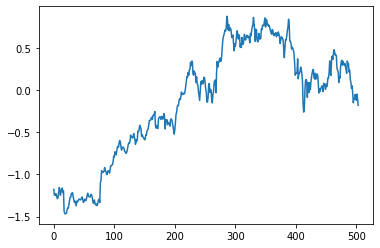

In [12]:
plt.plot(tmp['Close'])